## Medical Appointment No Shows Prediction
### [Kaggle](https://www.kaggle.com/datasets/joniarroba/noshowappointments)

### Load and learn about the dataset

In [3]:
import pandas as pd

# Load the dataset
file_path = './data/KaggleV2-May-2016.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
data_info = data.info()
data_description = data.describe(include='all')

data_info, data_description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


(None,
            PatientId  AppointmentID  Gender          ScheduledDay  \
 count   1.105270e+05   1.105270e+05  110527                110527   
 unique           NaN            NaN       2                103549   
 top              NaN            NaN       F  2016-05-06T07:09:54Z   
 freq             NaN            NaN   71840                    24   
 mean    1.474963e+14   5.675305e+06     NaN                   NaN   
 std     2.560949e+14   7.129575e+04     NaN                   NaN   
 min     3.921784e+04   5.030230e+06     NaN                   NaN   
 25%     4.172614e+12   5.640286e+06     NaN                   NaN   
 50%     3.173184e+13   5.680573e+06     NaN                   NaN   
 75%     9.439172e+13   5.725524e+06     NaN                   NaN   
 max     9.999816e+14   5.790484e+06     NaN                   NaN   
 
               AppointmentDay            Age   Neighbourhood    Scholarship  \
 count                 110527  110527.000000          110527  110527.000

### Basic Information

- Total Entries: 110,527
- Total Columns: 14
- Column Types:
  - 8 integer columns
  - 1 float column
  - 5 object (string) columns
- Column Descriptions
    - **PatientId**: Unique identifier for each patient (float64).
    - **AppointmentID**: Unique identifier for each appointment (int64).
    - **Gender**: Patient's gender (object, 'M' or 'F').
    - **ScheduledDay**: The day the appointment was scheduled (object).
    - **AppointmentDay**: The day of the actual appointment (object).
    - **Age**: Patient's age (int64).
    - **Neighbourhood**: The neighbourhood where the appointment took place (object).
    - **Scholarship**: Indicates whether the patient is enrolled in the Brasilian welfare program Bolsa Família (int64, 0 or 1).
    - **Hipertension**: Indicates if the patient has hypertension (int64, 0 or 1).
    - **Diabetes**: Indicates if the patient has diabetes (int64, 0 or 1).
    - **Alcoholism**: Indicates if the patient has a history of alcoholism (int64, 0 or 1).
    - **Handcap**: Indicates if the patient is handicapped (int64, values 0-4).
    - **SMS_received**: Indicates if the patient received an SMS reminder (int64, 0 or 1).
    - **No-show**: Indicates if the patient showed up for their appointment (object, 'No' or 'Yes').
- Key Statistics
    - **Gender**:
        - Female: 71,840
        - Male: 38,687
    - **Age**:
        - Mean: 37.09 years
        - Min: -1 (possibly an error)
        - Max: 115 years
    - **Neighbourhoods**: 81 unique neighbourhoods, with 'JARDIM CAMBURI' being the most frequent.
    - **Scholarship**: About 9.83% of patients are on a scholarship.
    - **Health Conditions**:
        - Hypertension: 19.72%
        - Diabetes: 7.19%
        - Alcoholism: 3.04%
        - Handicapped: 2.22% (note the maximum value is 4, which may need further clarification)
    - **SMS Received**: 32.1% of patients received an SMS reminder.
    - **No-show Rate**: 22.3% did not show up for their appointment.

## Visualize the data

/var/folders/73/w3z0jgns4nq7qgcvz5brvt7h0000gp/T/ipykernel_92554/374503490.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='No-show')


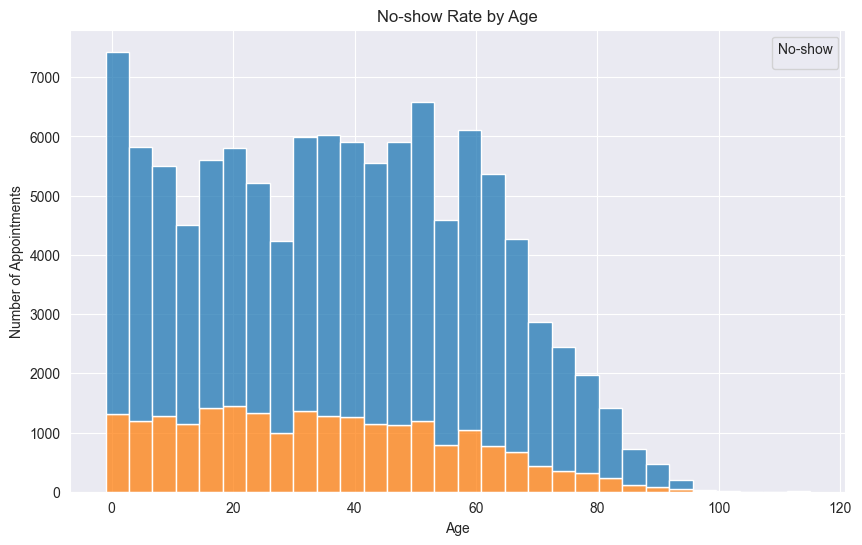

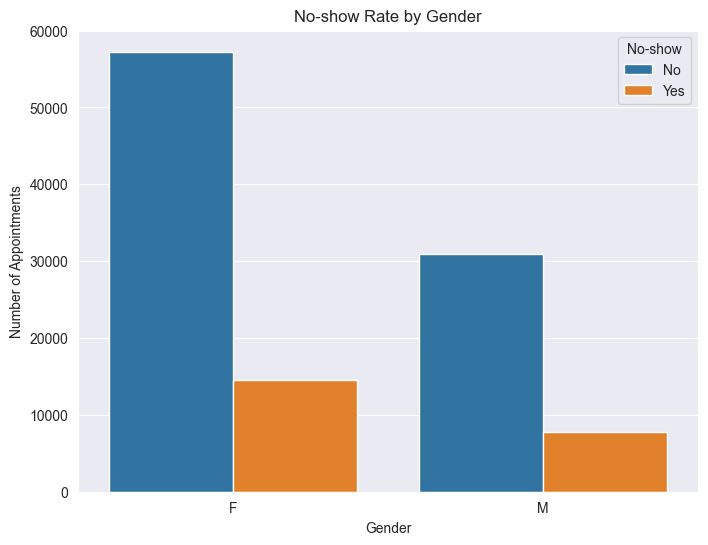

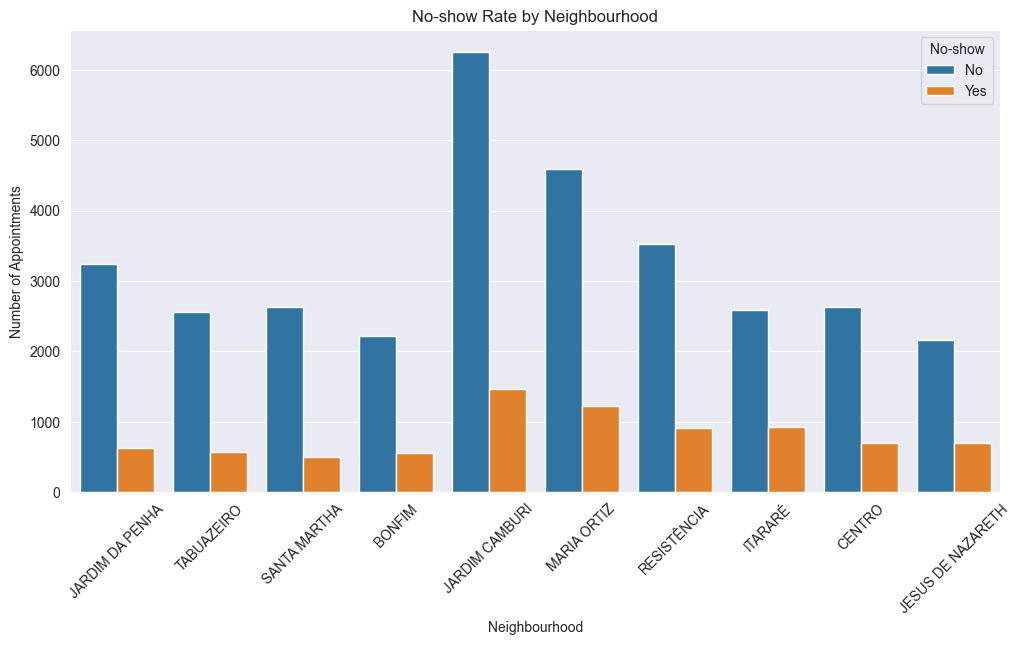

/var/folders/73/w3z0jgns4nq7qgcvz5brvt7h0000gp/T/ipykernel_92554/374503490.py:48: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='No-show')


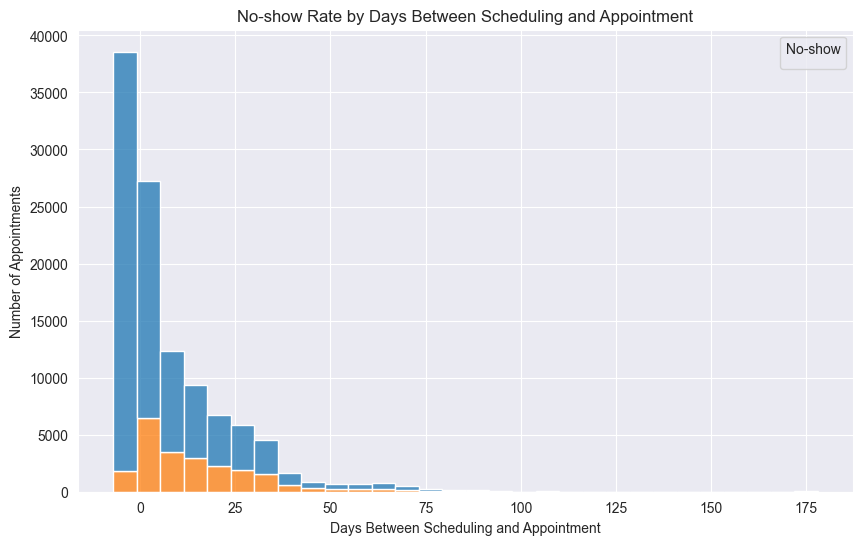

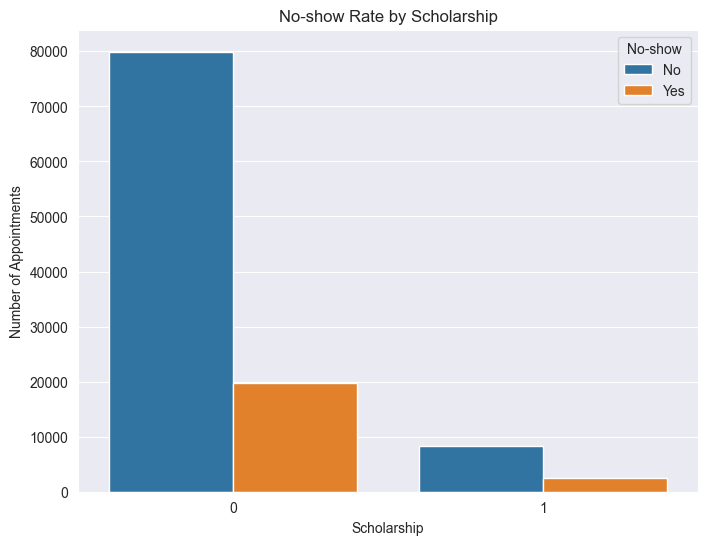

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert date columns to datetime
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'])
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])

# Calculate the difference between scheduled and appointment days
data['DaysBetween'] = (data['AppointmentDay'] - data['ScheduledDay']).dt.days

# Plot 1: No-show rate by age
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', hue='No-show', multiple='stack', bins=30)
plt.title('No-show Rate by Age')
plt.xlabel('Age')
plt.ylabel('Number of Appointments')
plt.legend(title='No-show')
plt.show()

# Plot 2: No-show rate by gender
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Gender', hue='No-show')
plt.title('No-show Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Appointments')
plt.legend(title='No-show')
plt.show()

# Plot 3: No-show rate by neighbourhood
top_neighbourhoods = data['Neighbourhood'].value_counts().head(10).index
plt.figure(figsize=(12, 6))
sns.countplot(data=data[data['Neighbourhood'].isin(top_neighbourhoods)], 
              x='Neighbourhood', hue='No-show')
plt.title('No-show Rate by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)
plt.legend(title='No-show')
plt.show()

# Plot 4: No-show rate by days between scheduling and appointment
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='DaysBetween', hue='No-show', multiple='stack', bins=30)
plt.title('No-show Rate by Days Between Scheduling and Appointment')
plt.xlabel('Days Between Scheduling and Appointment')
plt.ylabel('Number of Appointments')
plt.legend(title='No-show')
plt.show()

# Plot 5: No-show rate by scholarship
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Scholarship', hue='No-show')
plt.title('No-show Rate by Scholarship')
plt.xlabel('Scholarship')
plt.ylabel('Number of Appointments')
plt.legend(title='No-show')
plt.show()

## Next steps
 (1) pre-processing of the data (deal with categorical variables, add/remove features, normalize, remove anomalies and outliers) 
 (2) show correlation matrix between each variable and Show/No-Show dependendant variable